# Projects - Gender Prediction

In [55]:
import nltk
import random

Generally it is seen female names end with vowels i.e. `A E I O U Y` than male names.

This we can build a `classifier` to find gender of names. We have to determine what features to test for. Let's take a look at the last 2 letters of the name (whose gender is known) and build feature set

In [56]:
# NLTK provides a lot of names to train a model
from nltk.corpus import names

In [57]:
# it contains a collection of female and male names
names.fileids()

['female.txt', 'male.txt']

In [58]:
#for fileid in names.fileids():
    #print(fileid)

In [59]:
names.words(fileids='male.txt')[:8]

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel']

In [60]:
#names.words(fileid)[:8]

In [61]:
names.words(fileids='female.txt')[:8]

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael']

In [62]:
#for name in names.words(fileid):
    #print(name)

In [63]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [64]:
# conditional frequency distribution
cfd = nltk.ConditionalFreqDist((fileid,name[-2:]) for fileid in names.fileids() 
                               for name in names.words(fileid))
for a in cfd:
    print (a)

female.txt
male.txt


**Explanation**

`(fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid)`

`for fileid in names.fileids()` : This basically iterates through female names and male names referred as `fileid` here.

`for name in names.words(fileid)` : Now we will go through each female name and male name separately. 

`(fileid,name[-2:])` : Now we will get last 2 letters of each name in female and male name list separately

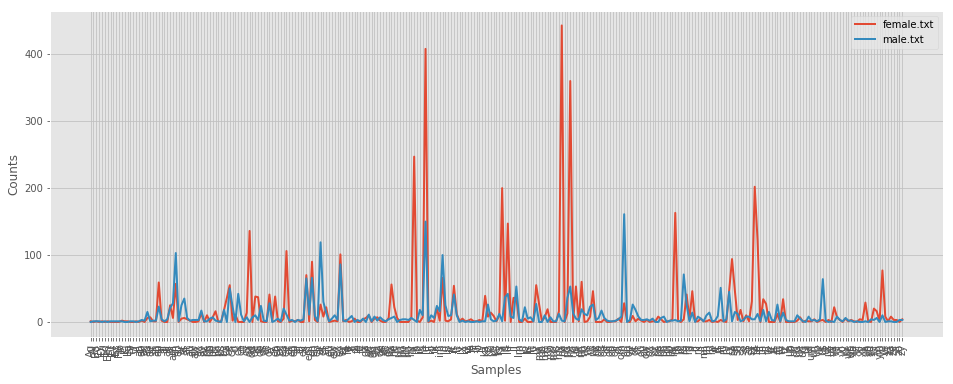

In [65]:
# female (red) and male(green) plotted seperately
plt.figure(figsize=(16,6))
cfd.plot()

The plot shows us that a decent number of ending letter pairs have tend to lean towards female or male names. That means last 2 letters of name are predictor for gender. Let's use this as our feature to build a feature set.

In [66]:
# write a function 2 extract last 2 letter of the name
def name_feature(name):
    return {'pair': name[-2:]} 

In [67]:
# Test
name_feature("Katy")

{'pair': 'ty'}

**So we can use this custom function to build a dictionary of features from the names provided by NLTK**

In [68]:
# (fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid)

In [69]:
name_list = ([(name, 'male') for name in names.words(fileids='male.txt')] + 
             [(name, "female") for name in names.words(fileids='female.txt')])

In [70]:
# As we added male name first it is added on the top of the list
name_list[:5]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male')]

In [71]:
# As we added female name last it is added on the end of the list
name_list[-5:]

[('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

As we are building a model we need to test it. We can split the `name and genders` into 2 groups. One will be training set (containing names and genders) and other will be testing set. Testing set given to the model will only contain names and NOT genders, to see how well model can predict based on the training model received from the training set.

Before splitting into training and test set, it is good to shuffle the `name list` as it's top contains male and bottom contains female.

In [72]:
random.shuffle(name_list)

In [73]:
# Now we see first 10 contain a mixture of male & female
name_list[:10]

[('Aldus', 'male'),
 ('Cabrina', 'female'),
 ('Leoine', 'female'),
 ('Queenie', 'female'),
 ('Averell', 'male'),
 ('Glad', 'female'),
 ('Anatol', 'male'),
 ('Tybi', 'female'),
 ('Stanton', 'male'),
 ('Byram', 'male')]

Now we can focus on the fetaure which is **2 letter pairs of all names**

In [74]:
#features = [({'pair':str(name[-2:])}, gender) for (name,gender) in name_list]

#features[:10]

In [75]:
features = [(name_feature(name), gender) for (name,gender) in name_list]
features[:10]

[({'pair': 'us'}, 'male'),
 ({'pair': 'na'}, 'female'),
 ({'pair': 'ne'}, 'female'),
 ({'pair': 'ie'}, 'female'),
 ({'pair': 'll'}, 'male'),
 ({'pair': 'ad'}, 'female'),
 ({'pair': 'ol'}, 'male'),
 ({'pair': 'bi'}, 'female'),
 ({'pair': 'on'}, 'male'),
 ({'pair': 'am'}, 'male')]

**Explanation**

`(name_feature(name), gender) for (name,gender) in name_list`

`for (name,gender) in name_list`: This will iterate through each `name, gender` pair in `name_list`

`(name_feature(name), gender)`: This will extract last 2 letters of each name and their gender

Now we see it has last 2 letters of the name and the gender. Now we have train our model on half of this (that contains last 2 letters and their respective gender) and then predict gender of the test set based on test set's last 2 letters of the name. 

Then we can find out how well our model performed!

In [76]:
len(features)/2

3972.0

In [77]:
training_set = features[:] 
# train on first 3972 name (last 2 letters) and gender from features

testing_set = features[3972:]
# test on last 3972 name (last 2 letters) and predict the gender

We can use the Naive Bayes Classifier to train our model. https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [78]:
# NaiveBays classifier is used to train our model
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [79]:
# Sayntan was not in the NLTK name list
male_names = names.words('male.txt')
"Sayantan" in male_names

False

In [81]:
# Our trained model predicts gender of someone named 'Carmello'
classifier.classify(name_feature("Sayantan"))

'male'

Even through training_set did NOT have this name `Sayantan`. Our model predicts someone named `Sayantan` will be male. 

**Our model never saw the gender of the test set, Let's see how accurately our trained model predicts gender of the test set, based on the last 2 letters of the names in the test set.

In [140]:
nltk.classify.accuracy(classifier, testing_set)

0.7814702920443102

**78% of the time our model correctly predicted/identified the correct gender from the last 2 letter of the name**

***Here we have used only 1 feature to predict the gender. Accuracy can improve tremendously when multiple features are taken into account***